# SPAM Filter

## Load libraries and data

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

In [100]:
import scipy.io
spam = scipy.io.loadmat('/Users/nikitaabalakin/Downloads/emails.mat')
spam

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Dec 07 13:57:47 2010',
 '__version__': '1.0',
 '__globals__': [],
 'X': <57173x10000 sparse matrix of type '<class 'numpy.float64'>'
 	with 2351499 stored elements in Compressed Sparse Column format>,
 'Y': array([[ 1, -1,  1, ...,  1,  1,  1]], dtype=int16)}

In [101]:
keys = ['__header__', '__version__', '__globals__']

for key in keys:
    spam.pop(key, None)

print(spam)

{'X': <57173x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2351499 stored elements in Compressed Sparse Column format>, 'Y': array([[ 1, -1,  1, ...,  1,  1,  1]], dtype=int16)}


In [102]:
spam.keys()

dict_keys(['X', 'Y'])

## Data check

In [103]:
print(spam['X'].transpose()) #transposing X to match dimensions of Y

  (0, 957)	1.0
  (0, 2164)	1.0
  (0, 2603)	1.0
  (0, 2925)	1.0
  (0, 2939)	1.0
  (0, 3010)	3.0
  (0, 3021)	3.0
  (0, 3330)	1.0
  (0, 3577)	1.0
  (0, 4148)	1.0
  (0, 4506)	1.0
  (0, 5193)	1.0
  (0, 6595)	3.0
  (0, 6799)	1.0
  (0, 6897)	1.0
  (0, 7237)	2.0
  (0, 7304)	1.0
  (0, 7567)	1.0
  (0, 9590)	3.0
  (0, 11570)	1.0
  (0, 11702)	2.0
  (0, 11826)	1.0
  (0, 11965)	3.0
  (0, 12246)	4.0
  (0, 12442)	1.0
  :	:
  (9999, 49154)	2.0
  (9999, 49216)	1.0
  (9999, 49476)	1.0
  (9999, 49515)	5.0
  (9999, 49832)	1.0
  (9999, 50228)	2.0
  (9999, 50575)	2.0
  (9999, 50752)	2.0
  (9999, 50803)	4.0
  (9999, 51154)	2.0
  (9999, 51332)	2.0
  (9999, 51580)	1.0
  (9999, 51854)	2.0
  (9999, 52354)	2.0
  (9999, 52431)	1.0
  (9999, 52725)	1.0
  (9999, 52836)	4.0
  (9999, 52948)	2.0
  (9999, 53318)	1.0
  (9999, 54075)	8.0
  (9999, 54150)	4.0
  (9999, 55717)	4.0
  (9999, 55792)	2.0
  (9999, 55908)	1.0
  (9999, 56173)	2.0


## Class distribution check

In [104]:
Y = spam['Y'][0]
Y_label = np.where((Y == -1), 'ham', 'spam') # for better visualisation

In [105]:
pd.value_counts(Y_label)

spam    8030
ham     1970
dtype: int64

<Axes: >

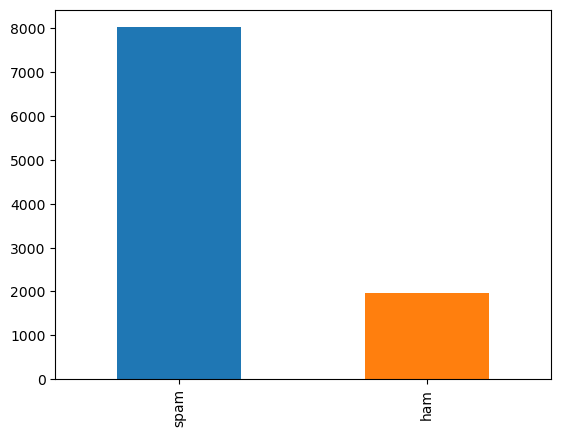

In [106]:
pd.value_counts(Y_label).plot(kind='bar', color=['C0', 'C1'])

<Axes: >

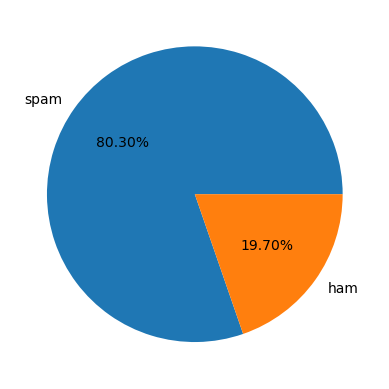

In [107]:
pd.value_counts(Y_label).plot(kind='pie',autopct='%1.2f%%', ylabel = '')

## Splitting data and checking distributions

In [108]:
X_train, X_test, y_train, y_test = train_test_split(spam['X'].transpose(), 
                                                    np.ravel(spam['Y']), 
                                                    test_size=0.25, 
                                                    random_state=6)

spam    6018
ham     1482
dtype: int64


<Axes: >

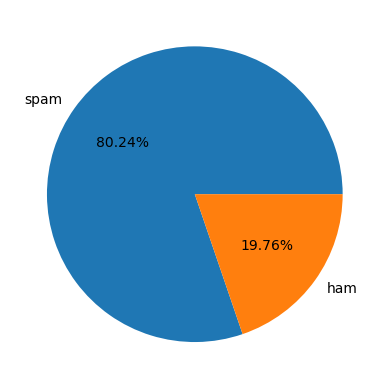

In [109]:
Y_label_train = np.where((y_train == -1), 'ham', 'spam')
print(pd.value_counts(Y_label_train))
pd.value_counts(Y_label_train).plot(kind='pie',autopct='%1.2f%%', ylabel = '')

spam    2012
ham      488
dtype: int64


<Axes: >

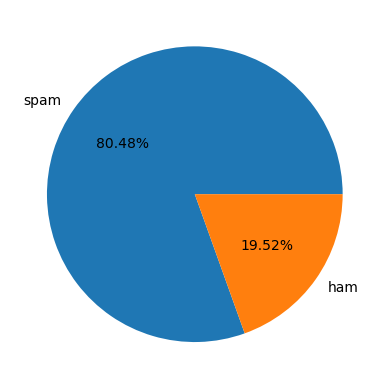

In [110]:
Y_label_test = np.where((y_test == -1), 'ham', 'spam')
print(pd.value_counts(Y_label_test))
pd.value_counts(Y_label_test).plot(kind='pie',autopct='%1.2f%%', ylabel = '')

## Models with term frequency

### SVM

In [111]:
svm = SVC(kernel = 'rbf')

In [112]:
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [113]:
print(confusion_matrix(y_test, y_pred_svm))
print('\n')
print(classification_report(y_test, y_pred_svm))

[[ 424   64]
 [   4 2008]]


              precision    recall  f1-score   support

          -1       0.99      0.87      0.93       488
           1       0.97      1.00      0.98      2012

    accuracy                           0.97      2500
   macro avg       0.98      0.93      0.95      2500
weighted avg       0.97      0.97      0.97      2500



### Tuning

In [114]:
param_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_svm = GridSearchCV(svm, param_svm, verbose=3)

In [115]:
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.802 total time=  25.6s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.802 total time=  25.4s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.803 total time=  25.6s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.803 total time=  25.3s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.803 total time=  25.6s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.802 total time=  25.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.802 total time=  24.9s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.803 total time=  25.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.803 total time=  24.9s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.803 total time=  25.5s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.816 total time=  21.7s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.804 total time=  26.2s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.809 total time=  26.4s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.806 total time=  26.1s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.807 total time=  26.5s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.810 total time=  26.2s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.809 total time=  26.1s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.817 total time=  27.5s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.809 total time=  26.2s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.809 total time=  27.6s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.917 total time=  28.3s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.908 total time=  24.7s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.907 total time=  24.8s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [116]:
grid_svm.best_estimator_

SVC(C=1000, gamma=0.0001)

In [117]:
grid_svm_predictions = grid_svm.predict(X_test)
grid_svm_probs = grid_svm.decision_function(X_test)

In [119]:
print(confusion_matrix(y_test, grid_svm_predictions))
print('\n')
print(classification_report(y_test, grid_svm_predictions))

[[ 484    4]
 [   5 2007]]


              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       488
           1       1.00      1.00      1.00      2012

    accuracy                           1.00      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500



In [120]:
grid_svm_precision, grid_svm_recall, _ = precision_recall_curve(y_test, grid_svm_probs)
grid_svm_auc = round(auc(grid_svm_recall, grid_svm_precision), 4)

### Naïve Bayes

In [121]:
naivBayes = MultinomialNB()

In [122]:
naivBayes.fit(X_train.toarray(), y_train)
y_pred_nb = naivBayes.predict(X_test.toarray())
probs_nb = svm.decision_function(X_test.toarray())

In [123]:
print(confusion_matrix(y_test, y_pred_nb))
print('\n')
nb_report = classification_report(y_test, y_pred_nb)
print(nb_report)

[[ 487    1]
 [  53 1959]]


              precision    recall  f1-score   support

          -1       0.90      1.00      0.95       488
           1       1.00      0.97      0.99      2012

    accuracy                           0.98      2500
   macro avg       0.95      0.99      0.97      2500
weighted avg       0.98      0.98      0.98      2500



In [124]:
nb_precision, nb_recall, _ = precision_recall_curve(y_test, probs_nb)
auc_nb = round(auc(nb_recall, nb_precision), 4)

### Logistic Regression

In [125]:
logmodel = LogisticRegression(penalty='l2')
logmodel.fit(X_train, y_train)

/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
y_pred_logistic = logmodel.predict(X_test)
log_probs = logmodel.decision_function(X_test)

In [127]:
print(confusion_matrix(y_test, y_pred_logistic))
print('\n')
print(classification_report(y_test, y_pred_logistic))

[[ 482    6]
 [   3 2009]]


              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       488
           1       1.00      1.00      1.00      2012

    accuracy                           1.00      2500
   macro avg       1.00      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500



### Tuning

In [129]:
param_grid_log = {'C': [00.1, 0.1, 1, 10, 100],
                 'max_iter' : [100, 1000, 10000]}
grid_log = GridSearchCV(logmodel, param_grid_log, verbose=3)

In [130]:
grid_log.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...............C=0.1, max_iter=100;, score=0.995 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...............C=0.1, max_iter=100;, score=0.993 total time=   1.1s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...............C=0.1, max_iter=100;, score=0.995 total time=   1.1s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...............C=0.1, max_iter=100;, score=0.995 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...............C=0.1, max_iter=100;, score=0.995 total time=   1.1s
[CV 1/5] END ..............C=0.1, max_iter=1000;, score=0.995 total time=   1.7s
[CV 2/5] END ..............C=0.1, max_iter=1000;, score=0.992 total time=   3.2s
[CV 3/5] END ..............C=0.1, max_iter=1000;, score=0.995 total time=   1.8s
[CV 4/5] END ..............C=0.1, max_iter=1000;, score=0.995 total time=   3.4s
[CV 5/5] END ..............C=0.1, max_iter=1000;, score=0.994 total time=   2.9s
[CV 1/5] END .............C=0.1, max_iter=10000;, score=0.995 total time=   1.6s
[CV 2/5] END .............C=0.1, max_iter=10000;, score=0.992 total time=   3.2s
[CV 3/5] END .............C=0.1, max_iter=10000;, score=0.995 total time=   1.6s
[CV 4/5] END .............C=0.1, max_iter=10000;, score=0.995 total time=   3.4s
[CV 5/5] END .............C=0.1, max_iter=10000;, score=0.994 total time=   2.9s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...............C=0.1, max_iter=100;, score=0.995 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...............C=0.1, max_iter=100;, score=0.993 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...............C=0.1, max_iter=100;, score=0.995 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...............C=0.1, max_iter=100;, score=0.995 total time=   0.9s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...............C=0.1, max_iter=100;, score=0.995 total time=   1.0s
[CV 1/5] END ..............C=0.1, max_iter=1000;, score=0.995 total time=   1.6s
[CV 2/5] END ..............C=0.1, max_iter=1000;, score=0.992 total time=   3.2s
[CV 3/5] END ..............C=0.1, max_iter=1000;, score=0.995 total time=   1.7s
[CV 4/5] END ..............C=0.1, max_iter=1000;, score=0.995 total time=   3.4s
[CV 5/5] END ..............C=0.1, max_iter=1000;, score=0.994 total time=   3.0s
[CV 1/5] END .............C=0.1, max_iter=10000;, score=0.995 total time=   1.6s
[CV 2/5] END .............C=0.1, max_iter=10000;, score=0.992 total time=   3.2s
[CV 3/5] END .............C=0.1, max_iter=10000;, score=0.995 total time=   1.7s
[CV 4/5] END .............C=0.1, max_iter=10000;, score=0.995 total time=   3.2s
[CV 5/5] END .............C=0.1, max_iter=10000;, score=0.994 total time=   3.1s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .................C=1, max_iter=100;, score=0.996 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END .................C=1, max_iter=100;, score=0.994 total time=   1.1s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .................C=1, max_iter=100;, score=0.995 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .................C=1, max_iter=100;, score=0.996 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END .................C=1, max_iter=100;, score=0.994 total time=   1.0s
[CV 1/5] END ................C=1, max_iter=1000;, score=0.996 total time=   1.9s
[CV 2/5] END ................C=1, max_iter=1000;, score=0.993 total time=   4.5s
[CV 3/5] END ................C=1, max_iter=1000;, score=0.994 total time=   2.1s
[CV 4/5] END ................C=1, max_iter=1000;, score=0.995 total time=   5.3s
[CV 5/5] END ................C=1, max_iter=1000;, score=0.994 total time=   4.5s
[CV 1/5] END ...............C=1, max_iter=10000;, score=0.996 total time=   2.0s
[CV 2/5] END ...............C=1, max_iter=10000;, score=0.993 total time=   4.4s
[CV 3/5] END ...............C=1, max_iter=10000;, score=0.994 total time=   2.1s
[CV 4/5] END ...............C=1, max_iter=10000;, score=0.995 total time=   5.0s
[CV 5/5] END ...............C=1, max_iter=10000;, score=0.994 total time=   4.5s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ................C=10, max_iter=100;, score=0.996 total time=   1.1s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ................C=10, max_iter=100;, score=0.997 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ................C=10, max_iter=100;, score=0.994 total time=   1.1s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ................C=10, max_iter=100;, score=0.996 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ................C=10, max_iter=100;, score=0.996 total time=   1.1s
[CV 1/5] END ...............C=10, max_iter=1000;, score=0.996 total time=   2.3s
[CV 2/5] END ...............C=10, max_iter=1000;, score=0.993 total time=   5.8s
[CV 3/5] END ...............C=10, max_iter=1000;, score=0.994 total time=   2.4s
[CV 4/5] END ...............C=10, max_iter=1000;, score=0.996 total time=   6.8s
[CV 5/5] END ...............C=10, max_iter=1000;, score=0.994 total time=   5.7s
[CV 1/5] END ..............C=10, max_iter=10000;, score=0.996 total time=   2.4s
[CV 2/5] END ..............C=10, max_iter=10000;, score=0.993 total time=   5.7s
[CV 3/5] END ..............C=10, max_iter=10000;, score=0.994 total time=   2.5s
[CV 4/5] END ..............C=10, max_iter=10000;, score=0.996 total time=   6.5s
[CV 5/5] END ..............C=10, max_iter=10000;, score=0.994 total time=   5.8s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...............C=100, max_iter=100;, score=0.995 total time=   1.1s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...............C=100, max_iter=100;, score=0.995 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...............C=100, max_iter=100;, score=0.993 total time=   1.2s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...............C=100, max_iter=100;, score=0.996 total time=   1.1s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...............C=100, max_iter=100;, score=0.995 total time=   1.0s
[CV 1/5] END ..............C=100, max_iter=1000;, score=0.996 total time=   2.7s
[CV 2/5] END ..............C=100, max_iter=1000;, score=0.993 total time=   6.0s
[CV 3/5] END ..............C=100, max_iter=1000;, score=0.993 total time=   2.9s
[CV 4/5] END ..............C=100, max_iter=1000;, score=0.996 total time=   8.0s
[CV 5/5] END ..............C=100, max_iter=1000;, score=0.994 total time=   6.9s
[CV 1/5] END .............C=100, max_iter=10000;, score=0.996 total time=   2.6s
[CV 2/5] END .............C=100, max_iter=10000;, score=0.993 total time=   6.0s
[CV 3/5] END .............C=100, max_iter=10000;, score=0.993 total time=   2.8s
[CV 4/5] END .............C=100, max_iter=10000;, score=0.996 total time=   8.2s
[CV 5/5] END .............C=100, max_iter=10000;, score=0.994 total time=   6.8s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 10000]},
             verbose=3)

In [131]:
grid_log.best_estimator_

LogisticRegression(C=10)

In [132]:
grid_log_predictions = grid_log.predict(X_test)
grid_log_probs = grid_log.decision_function(X_test)

In [133]:
print(confusion_matrix(y_test, grid_log_predictions))
print('\n')
print(classification_report(y_test, grid_log_predictions))

[[ 482    6]
 [   2 2010]]


              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       488
           1       1.00      1.00      1.00      2012

    accuracy                           1.00      2500
   macro avg       1.00      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500



In [134]:
grid_log_precision, grid_log_recall, _ = precision_recall_curve(y_test, grid_log_probs)
grid_log_auc = round(auc(grid_log_recall, grid_log_precision), 4)

### Precision-Recall Curves

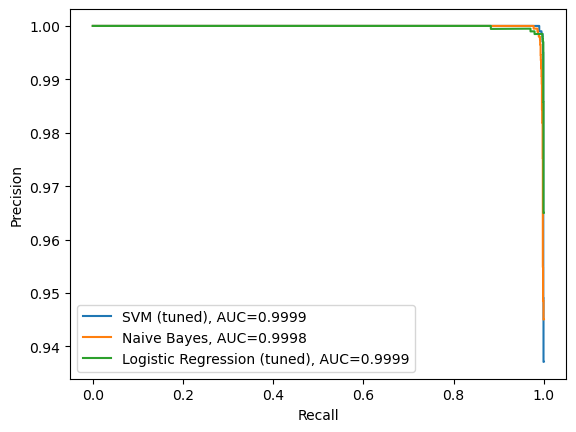

In [135]:
plt.plot(grid_svm_recall, grid_svm_precision, label="SVM (tuned), AUC={}".format(grid_svm_auc))
plt.plot(nb_recall, nb_precision,label="Naive Bayes, AUC={}".format(auc_nb))
plt.plot(grid_log_recall, grid_log_precision, label="Logistic Regression (tuned), AUC={}".format(grid_log_auc))

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend()
#nb_precision, nb_recall,
#macro_precision =  report['macro avg']['precision'] 
#macro_recall = report['macro avg']['recall']    
#macro_f1 = report['macro avg']['f1-score']

In [138]:
round(1/488, 4) # real emails identified as spam by NB classifier

0.002

In [140]:
round(53/2012, 4)

0.0263

## Models with TD-IDF

Frequency-inverse document frequency (tf-idf) is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.

In [141]:
tfidf_transformer = TfidfTransformer().fit(spam['X'].transpose())

In [142]:
X_tfidf = tfidf_transformer.transform(spam['X'].transpose())

In [143]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, 
                                                    np.ravel(spam['Y']), 
                                                    test_size=0.25, 
                                                    random_state=6)

In [144]:
svm.fit(X_train_tfidf, y_train_tfidf)
y_pred_svm_tfidf = svm.predict(X_test_tfidf)

In [145]:
print(confusion_matrix(y_test_tfidf, y_pred_svm_tfidf))
print('\n')
print(classification_report(y_test_tfidf, y_pred_svm_tfidf))

[[ 485    3]
 [   1 2011]]


              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       488
           1       1.00      1.00      1.00      2012

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



### Tuning

In [146]:
grid_svm = GridSearchCV(svm, param_svm, verbose=3)

In [147]:
grid_svm.fit(X_train_tfidf, y_train_tfidf)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.950 total time=  16.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.935 total time=  15.6s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.953 total time=  15.9s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.945 total time=  15.7s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.937 total time=  15.7s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.849 total time=  16.5s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.836 total time=  16.3s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.846 total time=  16.5s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.848 total time=  16.7s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.845 total time=  16.5s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.802 total time=  17.2s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.995 total time=  11.9s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.997 total time=  11.4s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.997 total time=  11.4s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.997 total time=  11.6s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.997 total time=   6.7s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.996 total time=   7.1s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.998 total time=   6.6s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.997 total time=   6.7s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.997 total time=   6.8s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.998 total time=   6.7s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.996 total time=   6.7s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.997 total time=   6.8s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [148]:
grid_svm.best_estimator_

SVC(C=100, gamma=0.1)

In [150]:
grid_svm_predictions_tfidf = grid_svm.predict(X_test_tfidf)
grid_svm_probs_tfidf = grid_svm.decision_function(X_test_tfidf)

In [151]:
print(confusion_matrix(y_test_tfidf, grid_svm_predictions_tfidf))
print('\n')
print(classification_report(y_test_tfidf, grid_svm_predictions_tfidf))

[[ 487    1]
 [   1 2011]]


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       488
           1       1.00      1.00      1.00      2012

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [152]:
grid_svm_precision_tfidf, grid_svm_recall_tfidf, _ = precision_recall_curve(y_test_tfidf, grid_svm_probs_tfidf)
grid_svm_auc_tfidf = round(auc(grid_svm_recall_tfidf, grid_svm_precision_tfidf), 4)

### Naïve Bayes

In [153]:
naivBayes.fit(X_train_tfidf.toarray(), y_train_tfidf)
y_pred_nb_tfidf = naivBayes.predict(X_test_tfidf.toarray())
probs_nb_tfidf = svm.decision_function(X_test_tfidf.toarray())

In [154]:
print(confusion_matrix(y_test_tfidf, y_pred_nb_tfidf))
print('\n')
print(classification_report(y_test_tfidf, y_pred_nb_tfidf))

[[ 466   22]
 [   8 2004]]


              precision    recall  f1-score   support

          -1       0.98      0.95      0.97       488
           1       0.99      1.00      0.99      2012

    accuracy                           0.99      2500
   macro avg       0.99      0.98      0.98      2500
weighted avg       0.99      0.99      0.99      2500



In [155]:
nb_precision_tfidf, nb_recall_tfidf, _ = precision_recall_curve(y_test_tfidf, probs_nb_tfidf)
auc_nb_tfidf = round(auc(nb_recall_tfidf, nb_precision_tfidf), 4)

### Logistic Regression

In [156]:
logmodel.fit(X_train_tfidf, y_train_tfidf)
y_pred_logistic_tfidf = logmodel.predict(X_test_tfidf)

In [157]:
print(confusion_matrix(y_test_tfidf, y_pred_logistic_tfidf))
print('\n')
print(classification_report(y_test_tfidf, y_pred_logistic_tfidf))

[[ 479    9]
 [   1 2011]]


              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       488
           1       1.00      1.00      1.00      2012

    accuracy                           1.00      2500
   macro avg       1.00      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500



### Tuning

In [158]:
grid_log.fit(X_train_tfidf, y_train_tfidf)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ...............C=0.1, max_iter=100;, score=0.943 total time=   0.2s
[CV 2/5] END ...............C=0.1, max_iter=100;, score=0.917 total time=   0.3s
[CV 3/5] END ...............C=0.1, max_iter=100;, score=0.942 total time=   0.2s
[CV 4/5] END ...............C=0.1, max_iter=100;, score=0.939 total time=   0.3s
[CV 5/5] END ...............C=0.1, max_iter=100;, score=0.924 total time=   0.2s
[CV 1/5] END ..............C=0.1, max_iter=1000;, score=0.943 total time=   0.3s
[CV 2/5] END ..............C=0.1, max_iter=1000;, score=0.917 total time=   0.2s
[CV 3/5] END ..............C=0.1, max_iter=1000;, score=0.942 total time=   0.3s
[CV 4/5] END ..............C=0.1, max_iter=1000;, score=0.939 total time=   0.2s
[CV 5/5] END ..............C=0.1, max_iter=1000;, score=0.924 total time=   0.2s
[CV 1/5] END .............C=0.1, max_iter=10000;, score=0.943 total time=   0.3s
[CV 2/5] END .............C=0.1, max_iter=10000;

/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...............C=100, max_iter=100;, score=0.996 total time=   1.0s
[CV 5/5] END ...............C=100, max_iter=100;, score=0.998 total time=   0.9s
[CV 1/5] END ..............C=100, max_iter=1000;, score=0.997 total time=   0.7s
[CV 2/5] END ..............C=100, max_iter=1000;, score=0.995 total time=   0.6s
[CV 3/5] END ..............C=100, max_iter=1000;, score=0.997 total time=   0.9s
[CV 4/5] END ..............C=100, max_iter=1000;, score=0.996 total time=   0.9s
[CV 5/5] END ..............C=100, max_iter=1000;, score=0.998 total time=   1.0s
[CV 1/5] END .............C=100, max_iter=10000;, score=0.997 total time=   0.7s
[CV 2/5] END .............C=100, max_iter=10000;, score=0.995 total time=   0.8s
[CV 3/5] END .............C=100, max_iter=10000;, score=0.997 total time=   0.8s
[CV 4/5] END .............C=100, max_iter=10000;, score=0.996 total time=   1.0s
[CV 5/5] END .............C=100, max_iter=10000;, score=0.998 total time=   1.0s


/Users/nikitaabalakin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 10000]},
             verbose=3)

In [159]:
grid_log.best_estimator_

LogisticRegression(C=100)

In [160]:
grid_log_predictions_tfidf = grid_log.predict(X_test_tfidf)
grid_log_probs_tfidf = grid_log.decision_function(X_test_tfidf)

In [161]:
print(confusion_matrix(y_test, grid_log_predictions_tfidf))
print('\n')
print(classification_report(y_test, grid_log_predictions_tfidf))

[[ 487    1]
 [   1 2011]]


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       488
           1       1.00      1.00      1.00      2012

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [162]:
grid_log_precision_tfidf, grid_log_recall_tfidf, _ = precision_recall_curve(y_test_tfidf, grid_log_probs_tfidf)
grid_log_auc_tfidf = round(auc(grid_log_recall_tfidf, grid_log_precision_tfidf), 4)

### Precision-Recall Curves

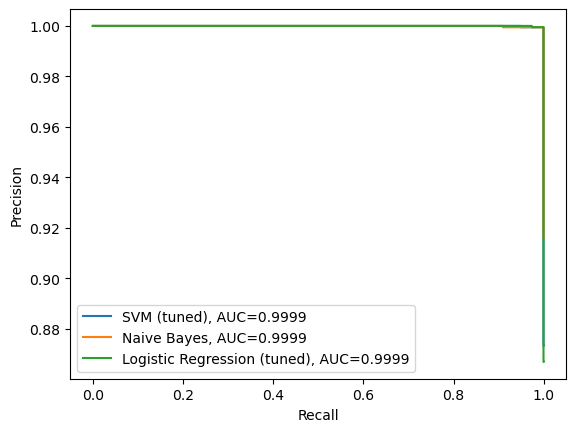

In [163]:
plt.plot(grid_svm_recall_tfidf, grid_svm_precision_tfidf, label="SVM (tuned), AUC={}".format(grid_svm_auc_tfidf))
plt.plot(nb_recall_tfidf, nb_precision_tfidf,label="Naive Bayes, AUC={}".format(auc_nb_tfidf))
plt.plot(grid_log_recall_tfidf, grid_log_precision_tfidf, label="Logistic Regression (tuned), AUC={}".format(grid_log_auc_tfidf))

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend()

In [232]:
round(1/488, 4)

0.002

In [1]:
round(1/2012, 4)

0.0005